In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

In [3]:
data = pd.read_csv("/Users/pandhari/Cognifyz_Task/Dataset .csv")

In [4]:
# Check missing values in the dataset
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Show only columns with missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print(missing_df)

          Missing Values  Percentage
Cuisines               9    0.094231


In [5]:
missing_cuisines_by_country = data[data['Cuisines'].isnull()].groupby('Country Code').size().reset_index(name='Missing Count')

# Show results
print(missing_cuisines_by_country)

   Country Code  Missing Count
0           216              9


In [6]:
data['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [7]:
# Step 1: Drop rows where 'Cuisines' is NaN (we already filled for 216, but safe to do)
cuisine_data = data.dropna(subset=['Cuisines']).copy()

# Step 2: Split the comma-separated cuisines and explode
cuisine_data['Cuisine List'] = cuisine_data['Cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
exploded = cuisine_data.explode('Cuisine List')

# Step 3: Group by Country Code and Cuisine type, then count
cuisine_counts = exploded.groupby(['Country Code', 'Cuisine List']).size().reset_index(name='Count')

# Optional: Sort within each country
cuisine_counts = cuisine_counts.sort_values(['Country Code', 'Count'], ascending=[True, False])

In [8]:
cuisine_counts[cuisine_counts['Count'] > 200]

,Country Code,Cuisine List,Count
65,1,North Indian,3946
23,1,Chinese,2690
30,1,Fast Food,1963
61,1,Mughlai,992
10,1,Bakery,726
24,1,Continental,724
43,1,Italian,682
78,1,South Indian,631
19,1,Cafe,627
27,1,Desserts,597


In [9]:
cuisine_counts['Country Code'].value_counts()

Country Code
1      90
216    58
215    40
189    38
214    38
30     31
184    29
148    26
94     19
162    19
166    19
191    18
208    18
14     17
37      8
Name: count, dtype: int64

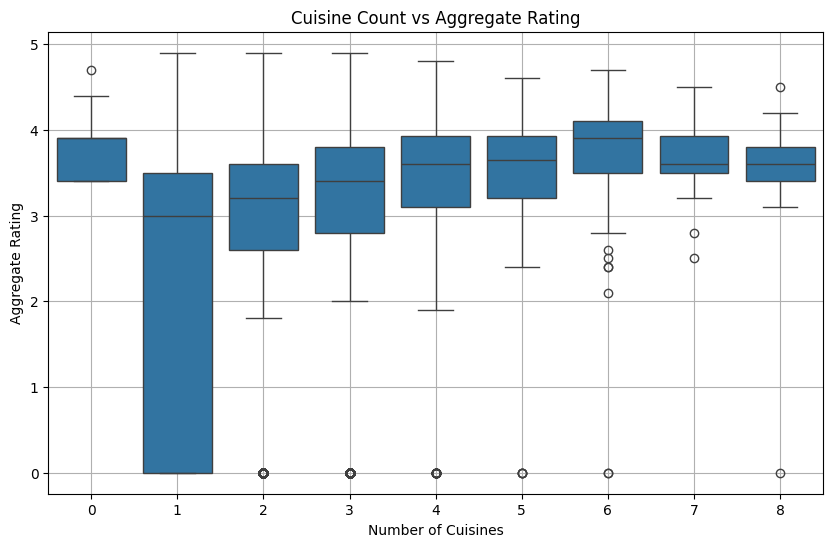

In [10]:
# Step 1: Count number of cuisines per row
data['Cuisine Count'] = data['Cuisines'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Step 2: Plot boxplot - Cuisine Count vs Aggregate Rating
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Cuisine Count', y='Aggregate rating', data=data)
plt.title('Cuisine Count vs Aggregate Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

# removing irrelevant features
- Restaurant ID
- Restaurant Name
- City
- Address
- Locality
- Locality Verbose
- Longitude
- Latitude
- Rating color
- Rating text
- Votes

In [11]:
data = data.drop(columns=['Restaurant ID' , 'Restaurant Name' , 'City' ,'Address' , 'Locality' , 'Locality Verbose' , 
'Longitude' , 'Latitude' , 'Currency' , 'Rating color' , 'Rating text'])

In [12]:
data

,Country Code,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Cuisine Count
0,162,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,314,3
1,162,Japanese,1200,Yes,No,No,No,3,4.5,591,1
2,162,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,270,4
3,162,"Japanese, Sushi",1500,No,No,No,No,4,4.9,365,2
4,162,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,229,2
...,...,...,...,...,...,...,...,...,...,...,...
9546,208,Turkish,80,No,No,No,No,3,4.1,788,1
9547,208,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,1034,3
9548,208,"Italian, World Cuisine",170,No,No,No,No,4,3.7,661,2
9549,208,Restaurant Cafe,120,No,No,No,No,4,4.0,901,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Cuisines              9542 non-null   object 
 2   Average Cost for two  9551 non-null   int64  
 3   Has Table booking     9551 non-null   object 
 4   Has Online delivery   9551 non-null   object 
 5   Is delivering now     9551 non-null   object 
 6   Switch to order menu  9551 non-null   object 
 7   Price range           9551 non-null   int64  
 8   Aggregate rating      9551 non-null   float64
 9   Votes                 9551 non-null   int64  
 10  Cuisine Count         9551 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 820.9+ KB


In [14]:
import pandas as pd

# 1. Clean and split cuisines
data['Cuisines_cleaned'] = data['Cuisines'].fillna('Unknown')
data['Cuisine_List'] = data['Cuisines_cleaned'].apply(lambda x: [i.strip() for i in x.split(',')])

# 2. Explode for counting
exploded = data[['Country Code', 'Cuisine_List']].explode('Cuisine_List')

# 3. Count cuisines per country
cuisine_counts = exploded.groupby(['Country Code', 'Cuisine_List']).size().reset_index(name='Count')

# 4. Get top 2 cuisines per country
top2_per_country = (
    cuisine_counts
    .sort_values(['Country Code', 'Count'], ascending=[True, False])
    .groupby('Country Code')
    .head(2)
)

# 5. Create a set of (Country Code, Cuisine) tuples
top_cuisine_set = set(
    tuple(x) for x in zip(top2_per_country['Country Code'], top2_per_country['Cuisine_List'])
)

# 6. Function to check for top cuisines per row
def cuisine_flags(row):
    country = row['Country Code']
    cuisines = row['Cuisine_List']
    flags = {}

    found_flag = False
    for cuisine in cuisines:
        if (country, cuisine) in top_cuisine_set:
            col_name = f"Cuisine_{cuisine.replace(' ', '_')}"
            flags[col_name] = 1
            found_flag = True

    flags['Cuisine_Other'] = 0 if found_flag else 1
    return pd.Series(flags)

# 7. Apply to each row
cuisine_features = data.apply(cuisine_flags, axis=1).fillna(0).astype(int)

# 8. Concatenate new features to data
data = pd.concat([data, cuisine_features], axis=1)

In [15]:
# Top 2 cuisines per country with counts
top2_per_country = (
    exploded.groupby(['Country Code', 'Cuisine_List'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Country Code', 'Count'], ascending=[True, False])
    .groupby('Country Code')
    .head(5)
)
# Display result
top2_per_country

,Country Code,Cuisine_List,Count
65,1,North Indian,3946
23,1,Chinese,2690
30,1,Fast Food,1963
61,1,Mughlai,992
10,1,Bakery,726
...,...,...,...
410,216,American,112
453,216,Seafood,59
420,216,Burger,49
449,216,Pizza,49


In [16]:
# Count unique cuisines in the top 2 per country
distinct_top_cuisines = top2_per_country['Cuisine_List'].nunique()

# Show the number
print("Number of distinct cuisines in top 2 per country:", distinct_top_cuisines)

Number of distinct cuisines in top 2 per country: 40


In [17]:
# Display the unique cuisines
unique_top_cuisines = top2_per_country['Cuisine_List'].unique()
print(unique_top_cuisines)

['North Indian' 'Chinese' 'Fast Food' 'Mughlai' 'Bakery'
 'Modern Australian' 'Coffee and Tea' 'Cafe' 'Australian' 'Breakfast'
 'Brazilian' 'Bar Food' 'Italian' 'Beverages' 'Grill' 'Asian' 'Canadian'
 'Japanese' 'Western' 'Indonesian' 'Sunda' 'European' 'Kiwi' 'American'
 'Filipino' 'Indian' 'International' 'French' 'Singaporean' 'Burger'
 'Sushi' 'Seafood' 'Desserts' 'Sri Lankan' 'Kebab' 'Turkish Pizza'
 'Restaurant Cafe' 'British' 'Pizza' 'Sandwich']


In [18]:
# This gives total occurrences of each cuisine globally
total_cuisine_counts = data['Cuisines'].value_counts().reset_index()
total_cuisine_counts.columns = ['Cuisine_List', 'Total_Count']

In [19]:
# Join the global count to your top cuisines per country
top2_with_global = top2_per_country.merge(
    total_cuisine_counts,
    on='Cuisine_List',
    how='left'
)

In [20]:
# For example, keep only those with good global presence
filtered_top2 = top2_with_global[top2_with_global['Total_Count'] > 50]

In [21]:
filtered_top2

,Country Code,Cuisine_List,Count,Total_Count
0,1,North Indian,3946,936.0
1,1,Chinese,2690,354.0
2,1,Fast Food,1963,354.0
3,1,Mughlai,992,103.0
4,1,Bakery,726,218.0
7,14,Cafe,6,299.0
12,30,Italian,6,54.0
13,30,Beverages,4,54.0
17,37,Chinese,1,354.0
18,37,Italian,1,54.0


In [22]:
# Count unique cuisines in the top 2 per country
distinct_top_cuisines = filtered_top2['Cuisine_List'].nunique()

# Show the number
print("Number of distinct cuisines in top 2 per country:", distinct_top_cuisines)

Number of distinct cuisines in top 2 per country: 10


In [23]:
# Display the unique cuisines
unique_top_cuisines = filtered_top2['Cuisine_List'].unique()
print(unique_top_cuisines)

['North Indian' 'Chinese' 'Fast Food' 'Mughlai' 'Bakery' 'Cafe' 'Italian'
 'Beverages' 'Desserts' 'Pizza']


In [24]:
selected_cuisines = [
    'North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery',
    'Cafe', 'Italian', 'Beverages', 'Desserts', 'Pizza'
]

In [25]:
# Step 1: Final 10 cuisines
selected_cuisines = [
    'North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Bakery',
    'Cafe', 'Italian', 'Beverages', 'Desserts', 'Pizza'
]

# Step 2: Remove all previously created Cuisine_ columns
data = data.loc[:, ~data.columns.str.startswith('Cuisine_')]

# Step 3: Recreate only the selected 10 cuisine columns
data['Cuisines'] = data['Cuisines'].fillna('')  # Just in case
for cuisine in selected_cuisines:
    col_name = f'Cuisine_{cuisine.replace(" ", "_")}'
    data[col_name] = data['Cuisines'].apply(lambda x: int(cuisine in x))

In [26]:
data.drop(columns=['Cuisines' , 'Cuisines_cleaned' , 'Cuisine Count'], inplace=True)

In [27]:
data.head()

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Cuisine_North_Indian,Cuisine_Chinese,Cuisine_Fast_Food,Cuisine_Mughlai,Cuisine_Bakery,Cuisine_Cafe,Cuisine_Italian,Cuisine_Beverages,Cuisine_Desserts,Cuisine_Pizza
0,162,1100,Yes,No,No,No,3,4.8,314,0,0,0,0,0,0,0,0,1,0
1,162,1200,Yes,No,No,No,3,4.5,591,0,0,0,0,0,0,0,0,0,0
2,162,4000,Yes,No,No,No,4,4.4,270,0,0,0,0,0,0,0,0,0,0
3,162,1500,No,No,No,No,4,4.9,365,0,0,0,0,0,0,0,0,0,0
4,162,1500,Yes,No,No,No,4,4.8,229,0,0,0,0,0,0,0,0,0,0


In [28]:
yes_no_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

# Map values to 1 (Yes) and 0 (No)
data[yes_no_cols] = data[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

/var/folders/42/94lj0cp519ncj7_m79j3_h3m0000gn/T/ipykernel_1199/1770360796.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[yes_no_cols] = data[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


In [29]:
data.head()

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Cuisine_North_Indian,Cuisine_Chinese,Cuisine_Fast_Food,Cuisine_Mughlai,Cuisine_Bakery,Cuisine_Cafe,Cuisine_Italian,Cuisine_Beverages,Cuisine_Desserts,Cuisine_Pizza
0,162,1100,1,0,0,0,3,4.8,314,0,0,0,0,0,0,0,0,1,0
1,162,1200,1,0,0,0,3,4.5,591,0,0,0,0,0,0,0,0,0,0
2,162,4000,1,0,0,0,4,4.4,270,0,0,0,0,0,0,0,0,0,0
3,162,1500,0,0,0,0,4,4.9,365,0,0,0,0,0,0,0,0,0,0
4,162,1500,1,0,0,0,4,4.8,229,0,0,0,0,0,0,0,0,0,0


In [30]:
# One-hot encode and convert boolean to int
country_dummies = pd.get_dummies(data['Country Code'], prefix='Country', drop_first=False).astype(int)

# Concatenate with original data
data = pd.concat([data, country_dummies], axis=1)

In [31]:
data.head()

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes,Cuisine_North_Indian,...,Country_148,Country_162,Country_166,Country_184,Country_189,Country_191,Country_208,Country_214,Country_215,Country_216
0,162,1100,1,0,0,0,3,4.8,314,0,...,0,1,0,0,0,0,0,0,0,0
1,162,1200,1,0,0,0,3,4.5,591,0,...,0,1,0,0,0,0,0,0,0,0
2,162,4000,1,0,0,0,4,4.4,270,0,...,0,1,0,0,0,0,0,0,0,0
3,162,1500,0,0,0,0,4,4.9,365,0,...,0,1,0,0,0,0,0,0,0,0
4,162,1500,1,0,0,0,4,4.8,229,0,...,0,1,0,0,0,0,0,0,0,0


## 🔍 Step-by-Step Discussion & Final Decisions

### 💰 Currency Normalization Challenge
The `Average Cost for two` column contains values in multiple currencies like INR, USD, AED, etc. Initially, I thought of converting all currencies into Indian Rupees for consistency.

But then I realized a problem — for example, a restaurant in the US charging ₹2500 and one in India charging ₹300 can both have the same rating (say 4.8). This makes it harder for the model to learn meaningful patterns if we only go by price in a single currency.

---

### 🌍 Adding Country Context
To tackle the issue above, I decided to use `Country Code` as a feature and apply One-Hot Encoding (OHE). This way, the model can differentiate between pricing patterns across different countries. For example, it can learn that high prices are common in some countries and still lead to high ratings.

Even though OHE can increase sparsity, the number of unique countries is small, so it won’t be a problem here.

---

### 📊 Handling Cost Better – Normalize Within Country
Instead of normalizing the cost globally, it makes more sense to normalize `Average Cost for two` **within each country** using z-score normalization. That way, the model gets a sense of whether a restaurant is cheap or expensive *relative to others in the same country*, which feels more meaningful.

---

### 🧠 Country-Aware Splitting
While splitting the dataset, I decided to take country into account. I’ll use something like `GroupShuffleSplit` to make sure that all countries are fairly represented in the train, validation, and test sets. This ensures the model generalizes well and doesn't get biased due to uneven country distribution.

---

In [32]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

# 🎯 Target column
target = 'Aggregate rating'

# ✅ Step 1: Split the data into Train (60%), Validation (20%), Test (20%) — group-aware by Country Code
gss1 = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_val_idx, test_idx = next(gss1.split(data, data[target], groups=data['Country Code']))

data_train_val = data.iloc[train_val_idx].copy()
data_test = data.iloc[test_idx].copy()

gss2 = GroupShuffleSplit(test_size=0.25, n_splits=1, random_state=42)  # 25% of 80% = 20%
train_idx, val_idx = next(gss2.split(data_train_val, data_train_val[target], groups=data_train_val['Country Code']))

data_train = data_train_val.iloc[train_idx].copy()
data_val = data_train_val.iloc[val_idx].copy()

# ✅ Step 2: Split into features (X) and target (y)
X_train_raw = data_train.drop(columns=[target])
y_train = data_train[target]

X_val_raw = data_val.drop(columns=[target])
y_val = data_val[target]

X_test_raw = data_test.drop(columns=[target])
y_test = data_test[target]

# ✅ Step 3: Normalize 'Average Cost for two' per Country Code — using training data stats ONLY
cost_stats = X_train_raw.groupby('Country Code')['Average Cost for two'].agg(['mean', 'std']).reset_index()
cost_stats.columns = ['Country Code', 'Mean_Cost', 'Std_Cost']

# Merge cost stats to each split
def normalize_cost(df_split):
    df_split = df_split.merge(cost_stats, on='Country Code', how='left')
    df_split['Normalized Cost'] = (df_split['Average Cost for two'] - df_split['Mean_Cost']) / df_split['Std_Cost']
    df_split.drop(columns=['Average Cost for two', 'Mean_Cost', 'Std_Cost'], inplace=True)
    return df_split

X_train = normalize_cost(X_train_raw)
X_val = normalize_cost(X_val_raw)
X_test = normalize_cost(X_test_raw)

In [33]:
X_train.drop(columns=['Country Code'], inplace=True)
X_val.drop(columns=['Country Code'], inplace=True)
X_test.drop(columns=['Country Code'], inplace=True)

In [34]:
X_train.head()

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Cuisine_North_Indian,Cuisine_Chinese,Cuisine_Fast_Food,Cuisine_Mughlai,...,Country_162,Country_166,Country_184,Country_189,Country_191,Country_208,Country_214,Country_215,Country_216,Normalized Cost
0,1,0,0,0,3,314,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.399538
1,1,0,0,0,3,591,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.320706
2,1,0,0,0,4,270,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.886608
3,0,0,0,0,4,365,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.084208
4,1,0,0,0,4,229,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.084208


In [35]:
# List of binary categorical columns
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

In [36]:
for col in binary_cols:
    print(f"{col}: {data[col].unique()}")

Has Table booking: [1 0]
Has Online delivery: [0 1]
Is delivering now: [0 1]
Switch to order menu: [0]


In [37]:
data['Switch to order menu'].value_counts()

Switch to order menu
0    9551
Name: count, dtype: int64

### Since Switch to order menu has all values as 0. Let's drop that col

In [38]:
data.drop(columns=['Switch to order menu'], inplace=True)

In [39]:
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now']

for col in binary_cols:
    print(f"\n📊 Value counts for '{col}':")
    print(data[col].value_counts(dropna=False))


📊 Value counts for 'Has Table booking':
Has Table booking
0    8393
1    1158
Name: count, dtype: int64

📊 Value counts for 'Has Online delivery':
Has Online delivery
0    7100
1    2451
Name: count, dtype: int64

📊 Value counts for 'Is delivering now':
Is delivering now
0    9517
1      34
Name: count, dtype: int64


In [40]:
# Filter rows where delivery is active
delivering_now = data[data['Is delivering now'] == 1]

# Count how many are from each Country Code
country_counts = delivering_now['Country Code'].value_counts()

# Optional: map to country names (if you have mapping)
country_mapping = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'South Africa',
    189: 'Sri Lanka',
    191: 'Turkey',
    208: 'UAE',
    214: 'UK',
    215: 'USA',
    216: 'Botswana'
}

# Add country name for readability
country_counts_named = country_counts.rename(index=country_mapping)

print(country_counts_named)

Country Code
India    34
Name: count, dtype: int64


In [41]:
data.drop(columns=['Is delivering now'], inplace=True)

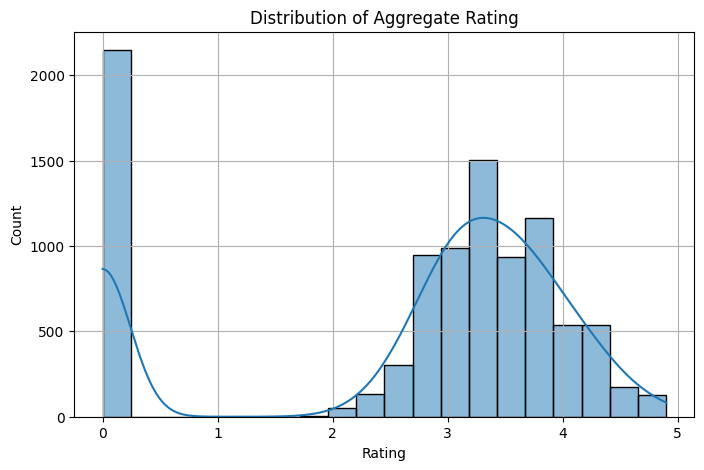

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

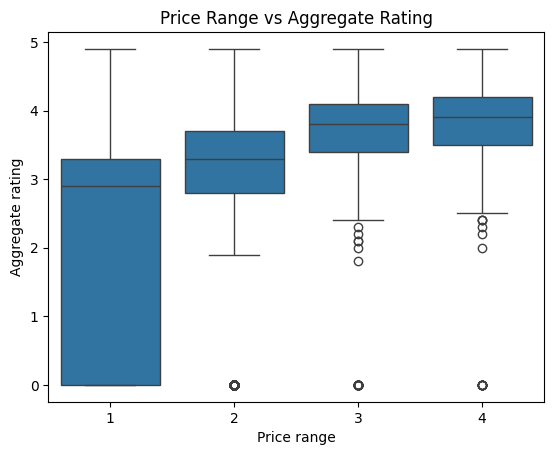

In [43]:
sns.boxplot(x='Price range', y='Aggregate rating', data=data)
plt.title('Price Range vs Aggregate Rating')
plt.show()

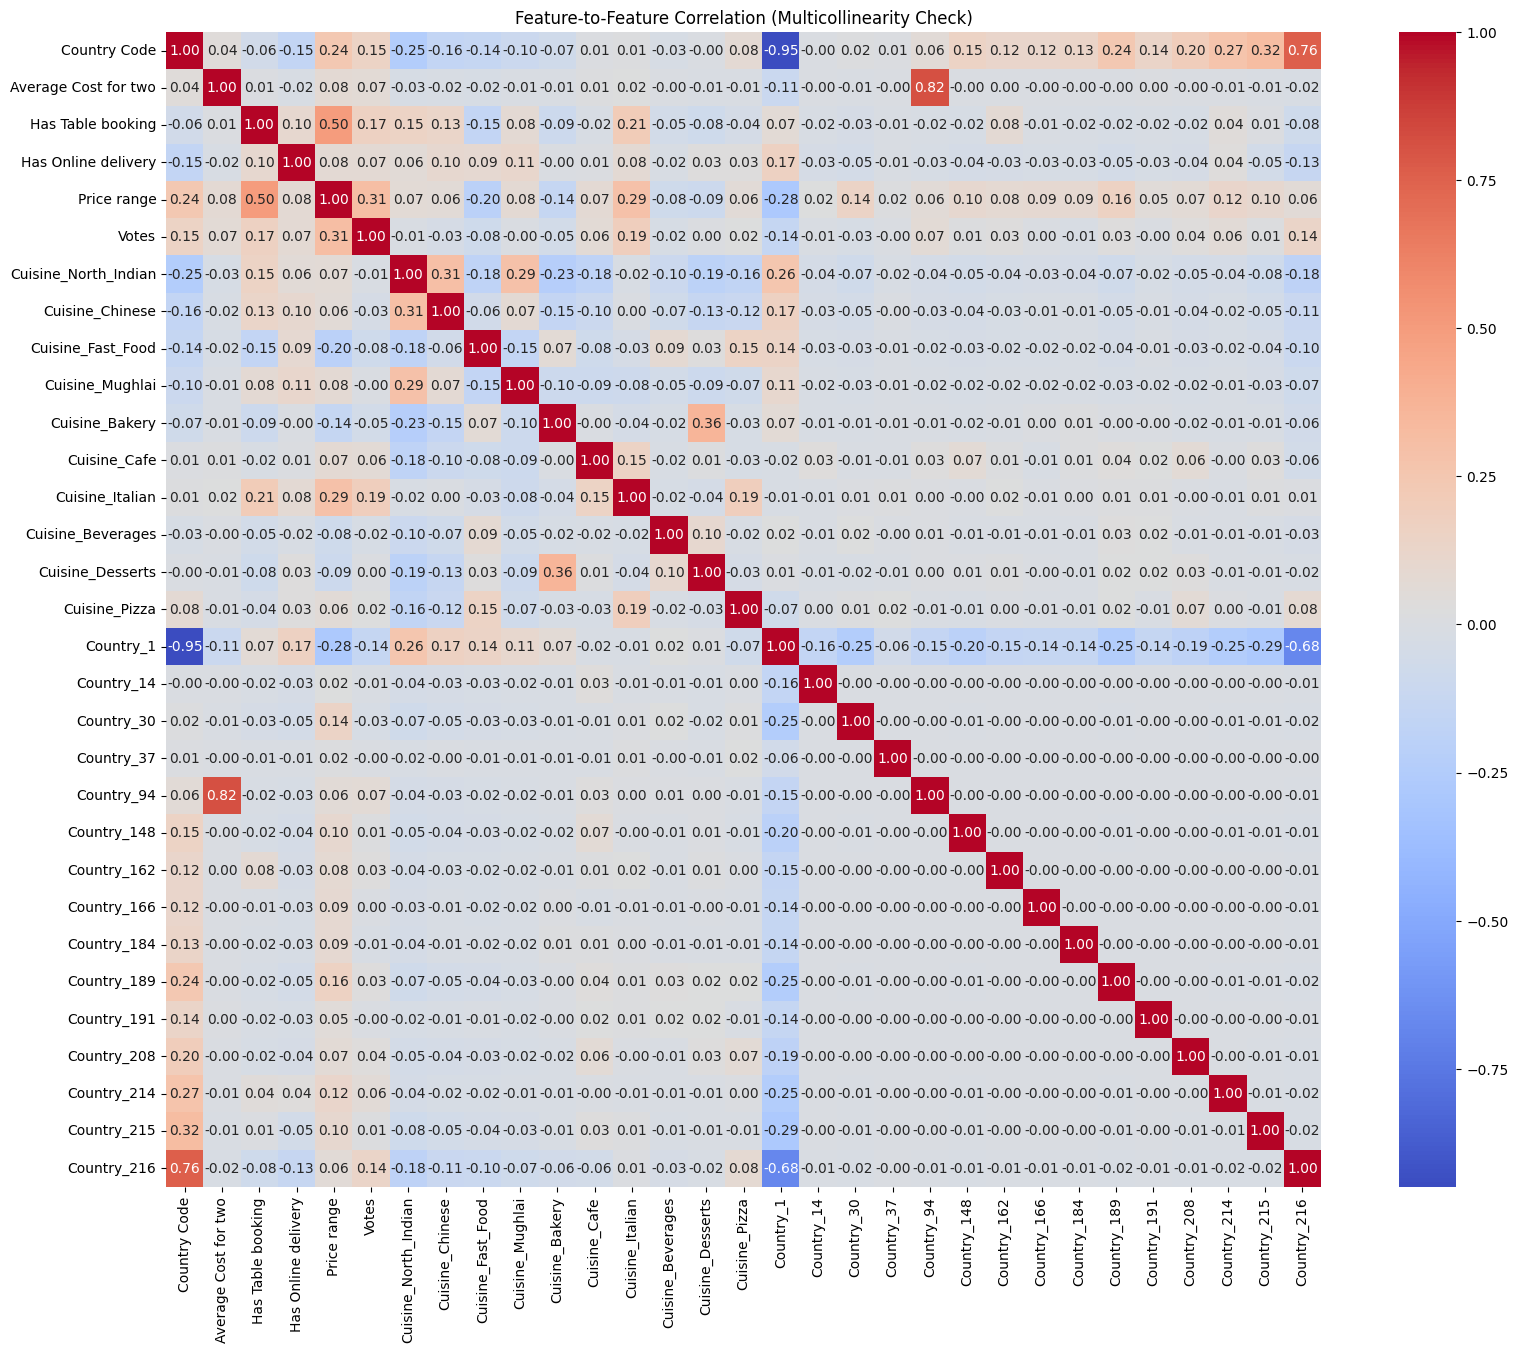

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get only numeric features
numeric_features = data.select_dtypes(include='number').drop(columns=['Aggregate rating'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature-to-Feature Correlation (Multicollinearity Check)')
plt.show()

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add a constant column for intercept (required by VIF)
from statsmodels.tools.tools import add_constant
X_vif = add_constant(numeric_features)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Feature       VIF
31           Country_216       inf
27           Country_191       inf
25           Country_184       inf
24           Country_166       inf
23           Country_162       inf
22           Country_148       inf
21            Country_94       inf
20            Country_37       inf
19            Country_30       inf
18            Country_14       inf
17             Country_1       inf
1           Country Code       inf
28           Country_208       inf
26           Country_189       inf
29           Country_214       inf
30           Country_215       inf
2   Average Cost for two  2.997046
5            Price range  1.905550
3      Has Table booking  1.506005
7   Cuisine_North_Indian  1.442046
11        Cuisine_Bakery  1.239412
15      Cuisine_Desserts  1.200397
13       Cuisine_Italian  1.197378
9      Cuisine_Fast_Food  1.172761
6                  Votes  1.163811
8        Cuisine_Chinese  1.163692
10       Cuisine_Mughlai  1.147952
16         Cuisine_P